In [ ]:
import torch
import transformers

# model_name = "gpt2"
model_name = "microsoft/phi-2"
model = transformers.AutoModelForCausalLM.from_pretrained(model_name, temperature=0.2, trust_remote_code=True, torch_dtype=torch.bfloat16)
tokenizer = transformers.AutoTokenizer.from_pretrained(model_name, trust_remote_code=True)

In [ ]:
prompt = "The meaning of life is"
input_ids = tokenizer.encode(prompt, return_tensors="pt")
output = model.generate(input_ids, max_length=50, do_sample=True)
print(tokenizer.decode(output[0], skip_special_tokens=True))

In [ ]:
import outlines
from human_eval.data import HUMAN_EVAL, stream_jsonl
problems = list(stream_jsonl(HUMAN_EVAL))

In [ ]:
len(problems)

In [ ]:
problems[:2]

In [ ]:
@outlines.prompt
def few_shots(instructions, examples, question):
    """{{ instructions }}

    {% for example in examples %}
    Question:
    ```
    {{ example.prompt }}
    ```
    Answer:
    ```
    {{ example.canonical_solution }}
    ```
    {% endfor %}

    Question:
    ```
    {{ question }}
    ```
    Answer:
    ```
    """

instructions = "Please answer the following question following the examples. Generate valid python code by indenting 4 spaces always."
examples = problems[:2]
# [
#     {"question": "2+2=?", "answer":4},
#     {"question": "3+3=?", "answer":6}
# ]
question = problems[3]['prompt']

prompt = few_shots(instructions, examples, question)
print(prompt)

In [ ]:
input_ids = tokenizer.encode(prompt, return_tensors="pt")
output = model.generate(input_ids, max_new_tokens=80, do_sample=True)
print(tokenizer.decode(output[0], skip_special_tokens=True))

In [ ]:
output_str = tokenizer.decode(output[0, input_ids.shape[-1]:], skip_special_tokens=True)
output_clean_str = output_str.split("```")[0]
print(output_clean_str)

In [ ]:
output_str = tokenizer.decode(output[0, input_ids.shape[-1]:], skip_special_tokens=True)
output_clean_str = output_str.split("```")[0]
print(output_clean_str)

In [ ]:
print(problems[3]['canonical_solution'])

In [1]:
import transformers

In [7]:
tokenizer = transformers.AutoTokenizer.from_pretrained("deepseek-ai/deepseek-coder-6.7b-instruct", trust_remote_code=True)

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


In [19]:
from humaneval import get_prompts_with_ids, problems
from tqdm import tqdm

In [20]:
problems

[{'task_id': 'HumanEval/0',
  'prompt': 'from typing import List\n\n\ndef has_close_elements(numbers: List[float], threshold: float) -> bool:\n    """ Check if in given list of numbers, are any two numbers closer to each other than\n    given threshold.\n    >>> has_close_elements([1.0, 2.0, 3.0], 0.5)\n    False\n    >>> has_close_elements([1.0, 2.8, 3.0, 4.0, 5.0, 2.0], 0.3)\n    True\n    """\n',
  'entry_point': 'has_close_elements',
  'canonical_solution': '    for idx, elem in enumerate(numbers):\n        for idx2, elem2 in enumerate(numbers):\n            if idx != idx2:\n                distance = abs(elem - elem2)\n                if distance < threshold:\n                    return True\n\n    return False\n',
  'test': "\n\nMETADATA = {\n    'author': 'jt',\n    'dataset': 'test'\n}\n\n\ndef check(candidate):\n    assert candidate([1.0, 2.0, 3.9, 4.0, 5.0, 2.2], 0.3) == True\n    assert candidate([1.0, 2.0, 3.9, 4.0, 5.0, 2.2], 0.05) == False\n    assert candidate([1.0, 2.0,

In [26]:
prompts_ids = get_prompts_with_ids()
pre = []
for prompt, task_id in tqdm(prompts_ids):
    input_ids = tokenizer.encode(prompt, return_tensors="pt")
    pre.append(input_ids.shape[1]) 


post = []
for i in problems[2:]:
    post_val = tokenizer.encode(i['canonical_solution'], return_tensors="pt") 
    post.append(post_val.shape[1])

100%|██████████| 162/162 [00:00<00:00, 203.04it/s]


In [28]:
import matplotlib.pyplot as plt

(array([ 4.,  4.,  2.,  1.,  8., 10.,  7.,  6.,  8., 12., 15.,  9.,  6.,
         4.,  7.,  7.,  6.,  9.,  4.,  2.,  1.,  3.,  2.,  0.,  4.,  3.,
         2.,  1.,  0.,  1.,  2.,  1.,  2.,  1.,  1.,  0.,  1.,  2.,  0.,
         2.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([574.  , 581.74, 589.48, 597.22, 604.96, 612.7 , 620.44, 628.18,
        635.92, 643.66, 651.4 , 659.14, 666.88, 674.62, 682.36, 690.1 ,
        697.84, 705.58, 713.32, 721.06, 728.8 , 736.54, 744.28, 752.02,
        759.76, 767.5 , 775.24, 782.98, 790.72, 798.46, 806.2 , 813.94,
        821.68, 829.42, 837.16, 844.9 , 852.64, 860.38, 868.12, 875.86,
        883.6 , 891.34, 899.08, 906.82, 914.56, 922.3 , 930.04, 937.78,
        945.52, 953.26, 961.  ]),
 <BarContainer object of 50 artists>)

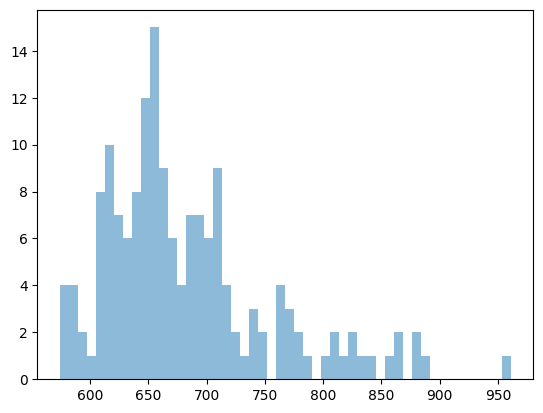

In [29]:
plt.hist(pre, bins=50, alpha=0.5, label='pre')

(array([10.,  8., 10.,  8.,  9., 13.,  7.,  9., 13.,  4.,  5.,  9.,  7.,
         5.,  6.,  4.,  2.,  5.,  4.,  3.,  2.,  3.,  3.,  3.,  0.,  1.,
         1.,  2.,  1.,  2.,  0.,  1.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([  7. ,  12.6,  18.2,  23.8,  29.4,  35. ,  40.6,  46.2,  51.8,
         57.4,  63. ,  68.6,  74.2,  79.8,  85.4,  91. ,  96.6, 102.2,
        107.8, 113.4, 119. , 124.6, 130.2, 135.8, 141.4, 147. , 152.6,
        158.2, 163.8, 169.4, 175. , 180.6, 186.2, 191.8, 197.4, 203. ,
        208.6, 214.2, 219.8, 225.4, 231. , 236.6, 242.2, 247.8, 253.4,
        259. , 264.6, 270.2, 275.8, 281.4, 287. ]),
 <BarContainer object of 50 artists>)

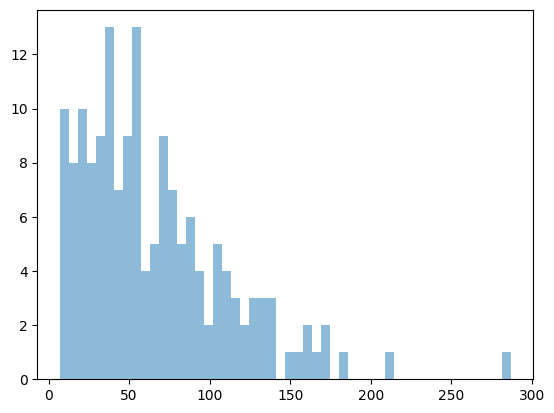

In [30]:
plt.hist(post, bins=50, alpha=0.5, label='pre')